# model_0 on extended data training

In [1]:
# Choosing of single GPU - has to be done before tensorflow import:
# All the notebooks used earlier with that option have to be closed or to have to have restarted the kernel
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"        # Will use only single GPU device

In [2]:
import numpy as np
import pandas as pd
import my_functions
import keras
from keras import layers
from keras import models
from keras import optimizers
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/artur/.local/lib/python3.6/site-packages/tensorflow/python/fra

## 1. Model configuration

####  Not needed - use of already existing model

## 2. Data loading and transformation
- Available data:

In [3]:
%%bash
ls ./Used_data

TEST_IMAGES.npy
TEST_LABELS.npy
TRAIN_IMAGES.npy
TRAIN_LABELS.npy
TRAIN_X_EXTD.npy
TRAIN_Y_EXTD.npy
VALID_IMAGES.npy
VALID_LABELS.npy


In [4]:
# Loads and transforms 'Used data' to CNN training

train_x_name = 'TRAIN_X_EXTD.npy'
train_y_name = 'TRAIN_Y_EXTD.npy'

TRAIN_X, VALID_X, TEST_X, TRAIN_Y, VALID_Y, TEST_Y = my_functions.data_conversion(train_x_name, train_y_name)


LOADED DATA (before conversion):
  set name              shape  dtype       data sight
0  TRAIN_X  (8000, 96, 96, 3)  uint8     [87, 73, 37]
1  TRAIN_Y            (8000,)  uint8                2
2  VALID_X   (500, 96, 96, 3)  uint8  [204, 205, 210]
3  VALID_Y             (500,)  uint8                1
4   TEST_X   (500, 96, 96, 3)  uint8  [132, 167, 203]
5   TEST_Y             (500,)  uint8                1

DATA FOR TRAINING (after conversion):
  set name              shape    dtype                            data sight
0  TRAIN_X  (8000, 96, 96, 3)  float32  [0.34117648, 0.28627452, 0.14509805]
1  TRAIN_Y          (8000, 2)  float32                            [0.0, 1.0]
2  VALID_X   (500, 96, 96, 3)  float32           [0.8, 0.8039216, 0.8235294]
3  VALID_Y           (500, 2)  float32                            [1.0, 0.0]
4   TEST_X   (500, 96, 96, 3)  float32     [0.5176471, 0.654902, 0.79607844]
5   TEST_Y           (500, 2)  float32                            [1.0, 0.0]


## 3. Model training

For the training the models without 'trd' have to be choosen,
models with 'trd' are trained already

- Available models to choice:

In [5]:
%%bash
ls ./Models

model_0_0-100-100-RMSp-trd.h5
model_0_0-100-100-sgd-trd.h5
model_0_0-100-120-rmsp-trd.h5
model_0_0-100-150-adlt-trd.h5
model_0_0-100-150-sgd-trd.h5
model_0_0-15-15-rmsp-trd.h5
model_0_0-15-25-RMSp-trd.h5
model_0_0-15-40-sgd-trd.h5
model_0_0-30-100-sgd-trd.h5
model_0.h5


### 3.1 model_0 & optimizer sgd:

Train on 8000 samples, validate on 500 samples
Epoch 1/150
8000/8000 [==============================] - 15s 2ms/step - loss: 0.6923 - acc: 0.4955 - val_loss: 0.6900 - val_acc: 0.5280
Epoch 2/150
8000/8000 [==============================] - 7s 905us/step - loss: 0.6903 - acc: 0.5456 - val_loss: 0.6877 - val_acc: 0.6260
Epoch 3/150
8000/8000 [==============================] - 7s 892us/step - loss: 0.6878 - acc: 0.6562 - val_loss: 0.6841 - val_acc: 0.6620
Epoch 4/150
8000/8000 [==============================] - 7s 903us/step - loss: 0.6841 - acc: 0.6484 - val_loss: 0.6795 - val_acc: 0.7700
Epoch 5/150
8000/8000 [==============================] - 7s 900us/step - loss: 0.6786 - acc: 0.6994 - val_loss: 0.6703 - val_acc: 0.7480
Epoch 6/150
8000/8000 [==============================] - 7s 896us/step - loss: 0.6681 - acc: 0.7046 - val_loss: 0.6517 - val_acc: 0.6900
Epoch 7/150
8000/8000 [==============================] - 7s 903us/step - loss: 0.6464 - acc: 0.7107 - val_loss: 0.6121 - val_acc: 0.

8000/8000 [==============================] - 7s 900us/step - loss: 0.1267 - acc: 0.9651 - val_loss: 0.2188 - val_acc: 0.9260
Epoch 120/150
8000/8000 [==============================] - 7s 884us/step - loss: 0.0660 - acc: 0.9795 - val_loss: 0.2465 - val_acc: 0.9320
Epoch 121/150
8000/8000 [==============================] - 7s 883us/step - loss: 0.0973 - acc: 0.9735 - val_loss: 0.2387 - val_acc: 0.9340
Epoch 122/150
8000/8000 [==============================] - 7s 895us/step - loss: 0.0248 - acc: 0.9971 - val_loss: 0.2598 - val_acc: 0.9360
Epoch 123/150
8000/8000 [==============================] - 7s 892us/step - loss: 0.0183 - acc: 0.9983 - val_loss: 0.2746 - val_acc: 0.9360
Epoch 124/150
8000/8000 [==============================] - 7s 890us/step - loss: 0.0155 - acc: 0.9986 - val_loss: 0.2756 - val_acc: 0.9340
Epoch 125/150
8000/8000 [==============================] - 7s 890us/step - loss: 0.0143 - acc: 0.9983 - val_loss: 0.2950 - val_acc: 0.9380
Epoch 126/150
8000/8000 [================

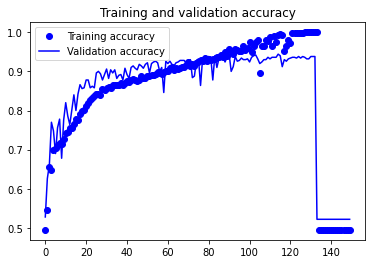

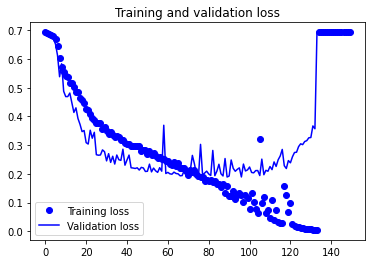

In [6]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 150
batch_size = 100
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_8-100-150-sgd-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [7]:
remark = '80-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.2 model_0 & optimizer sgd:

Train on 8000 samples, validate on 500 samples
Epoch 1/100
8000/8000 [==============================] - 8s 974us/step - loss: 0.6923 - acc: 0.4959 - val_loss: 0.6900 - val_acc: 0.5280
Epoch 2/100
8000/8000 [==============================] - 7s 891us/step - loss: 0.6902 - acc: 0.5315 - val_loss: 0.6879 - val_acc: 0.6720
Epoch 3/100
8000/8000 [==============================] - 7s 891us/step - loss: 0.6878 - acc: 0.6501 - val_loss: 0.6843 - val_acc: 0.7040
Epoch 4/100
8000/8000 [==============================] - 7s 896us/step - loss: 0.6841 - acc: 0.6934 - val_loss: 0.6787 - val_acc: 0.6880
Epoch 5/100
8000/8000 [==============================] - 7s 890us/step - loss: 0.6786 - acc: 0.6846 - val_loss: 0.6713 - val_acc: 0.7880
Epoch 6/100
8000/8000 [==============================] - 7s 893us/step - loss: 0.6682 - acc: 0.7140 - val_loss: 0.6518 - val_acc: 0.7440
Epoch 7/100
8000/8000 [==============================] - 7s 892us/step - loss: 0.6465 - acc: 0.7075 - val_loss: 0.6158 - val_acc: 0

8000/8000 [==============================] - 7s 890us/step - loss: 0.2415 - acc: 0.9053 - val_loss: 0.2333 - val_acc: 0.9080
Epoch 61/100
8000/8000 [==============================] - 7s 888us/step - loss: 0.2412 - acc: 0.9010 - val_loss: 0.2007 - val_acc: 0.9320
Epoch 62/100
8000/8000 [==============================] - 7s 912us/step - loss: 0.2262 - acc: 0.9100 - val_loss: 0.1997 - val_acc: 0.9280
Epoch 63/100
8000/8000 [==============================] - 7s 890us/step - loss: 0.2489 - acc: 0.9000 - val_loss: 0.2225 - val_acc: 0.8980
Epoch 64/100
8000/8000 [==============================] - 7s 889us/step - loss: 0.2257 - acc: 0.9110 - val_loss: 0.1945 - val_acc: 0.9300
Epoch 65/100
8000/8000 [==============================] - 7s 888us/step - loss: 0.2422 - acc: 0.9074 - val_loss: 0.2078 - val_acc: 0.9260
Epoch 66/100
8000/8000 [==============================] - 7s 891us/step - loss: 0.2282 - acc: 0.9084 - val_loss: 0.1937 - val_acc: 0.9240
Epoch 67/100
8000/8000 [=======================

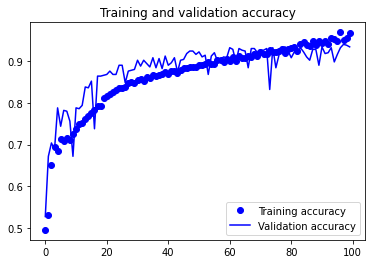

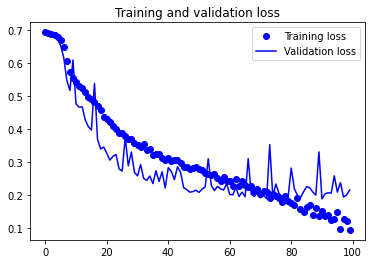

In [8]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 100
batch_size = 100
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_8-100-100-sgd-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [9]:
remark = 'ok.'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.3 model_0 & optimizer sgd:

Train on 8000 samples, validate on 500 samples
Epoch 1/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.6898 - acc: 0.5694 - val_loss: 0.6833 - val_acc: 0.7800
Epoch 2/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6723 - acc: 0.7010 - val_loss: 0.6334 - val_acc: 0.7720
Epoch 3/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5950 - acc: 0.7065 - val_loss: 0.5025 - val_acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5425 - acc: 0.7372 - val_loss: 0.4629 - val_acc: 0.7880
Epoch 5/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5070 - acc: 0.7626 - val_loss: 0.4641 - val_acc: 0.7800
Epoch 6/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4783 - acc: 0.7868 - val_loss: 0.3637 - val_acc: 0.8600
Epoch 7/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4376 - acc: 0.8130 - val_loss: 0.3159 - val_acc: 0.8740
Epoch 8

Epoch 61/100
8000/8000 [==============================] - 9s 1ms/step - loss: 9.0692e-04 - acc: 1.0000 - val_loss: 0.4645 - val_acc: 0.9320
Epoch 62/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.0752 - acc: 0.9479 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 63/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 64/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 65/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 66/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 67/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6931 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5220
Epoch 68/100
8000/8000 [====================

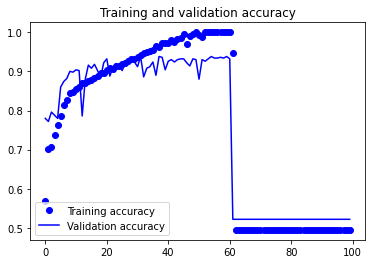

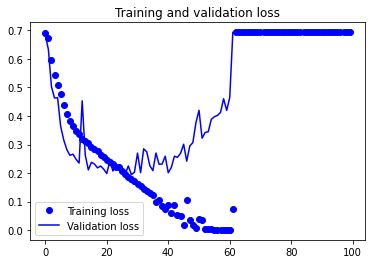

In [10]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 100
batch_size = 30
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_8-30-100-sgd-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [11]:
remark = '30-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.4 model_0 & optimizer sgd:

Train on 8000 samples, validate on 500 samples
Epoch 1/32
8000/8000 [==============================] - 10s 1ms/step - loss: 0.6898 - acc: 0.5685 - val_loss: 0.6828 - val_acc: 0.7060
Epoch 2/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.6723 - acc: 0.6774 - val_loss: 0.6354 - val_acc: 0.7760
Epoch 3/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5971 - acc: 0.7055 - val_loss: 0.4952 - val_acc: 0.7860
Epoch 4/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5417 - acc: 0.7385 - val_loss: 0.4848 - val_acc: 0.7600
Epoch 5/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5159 - acc: 0.7558 - val_loss: 0.3957 - val_acc: 0.8420
Epoch 6/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4753 - acc: 0.7883 - val_loss: 0.3503 - val_acc: 0.8540
Epoch 7/32
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4384 - acc: 0.8098 - val_loss: 0.3346 - val_acc: 0.8640
Epoch 8/32
800

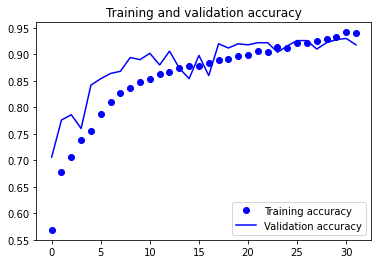

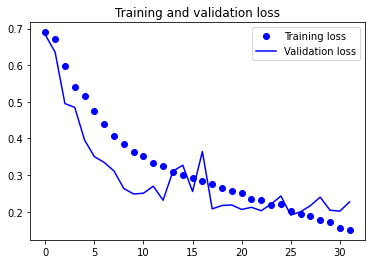

In [12]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 32
batch_size = 30
optimizer = 'sgd'
optimizer_name = optimizer
trd_model_name = 'model_0_8-30-32-sgd-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [13]:
remark = 'ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.5 model_0 & optimizer adadelta:

Train on 8000 samples, validate on 500 samples
Epoch 1/30
8000/8000 [==============================] - 11s 1ms/step - loss: 0.5851 - acc: 0.7023 - val_loss: 0.5248 - val_acc: 0.7300
Epoch 2/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3924 - acc: 0.8374 - val_loss: 0.2992 - val_acc: 0.8820
Epoch 3/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3208 - acc: 0.8679 - val_loss: 0.2627 - val_acc: 0.8940
Epoch 4/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2868 - acc: 0.8854 - val_loss: 0.2643 - val_acc: 0.8920
Epoch 5/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2479 - acc: 0.9036 - val_loss: 0.2715 - val_acc: 0.8840
Epoch 6/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2155 - acc: 0.9136 - val_loss: 0.2205 - val_acc: 0.9120
Epoch 7/30
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1840 - acc: 0.9275 - val_loss: 0.2011 - val_acc: 0.9220
Epoch 8/

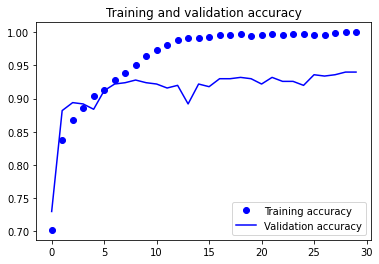

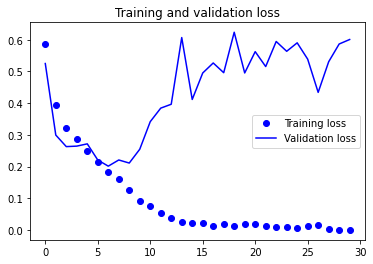

In [14]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 30
batch_size = 30
optimizer = 'adadelta'
optimizer_name = optimizer
trd_model_name = 'model_0_8-30-35-adlt-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [15]:
remark = '7-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.6 model_0 & optimizer adadelta:

Train on 8000 samples, validate on 500 samples
Epoch 1/8
8000/8000 [==============================] - 11s 1ms/step - loss: 0.5754 - acc: 0.7111 - val_loss: 0.3860 - val_acc: 0.8680
Epoch 2/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3804 - acc: 0.8438 - val_loss: 0.2681 - val_acc: 0.8860
Epoch 3/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3277 - acc: 0.8669 - val_loss: 0.2637 - val_acc: 0.8980
Epoch 4/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2867 - acc: 0.8817 - val_loss: 0.2171 - val_acc: 0.9140
Epoch 5/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2564 - acc: 0.8965 - val_loss: 0.2406 - val_acc: 0.9240
Epoch 6/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2252 - acc: 0.9081 - val_loss: 0.3109 - val_acc: 0.8880
Epoch 7/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1941 - acc: 0.9220 - val_loss: 0.1990 - val_acc: 0.9220
Epoch 8/8
500/5

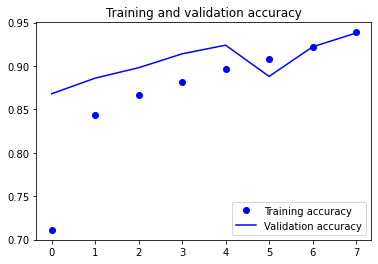

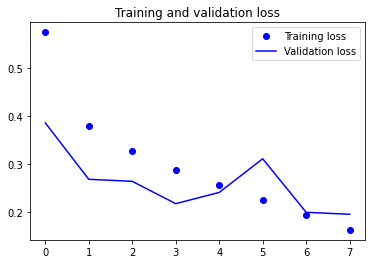

In [16]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 8
batch_size = 30
optimizer = 'adadelta'
optimizer_name = optimizer
trd_model_name = 'model_0_8-30-8-adlt-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [17]:
remark = 'ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.7 model_0 & optimizer adadelta:

Train on 8000 samples, validate on 500 samples
Epoch 1/30
8000/8000 [==============================] - 8s 1ms/step - loss: 0.6588 - acc: 0.6497 - val_loss: 0.6190 - val_acc: 0.6640
Epoch 2/30
8000/8000 [==============================] - 7s 932us/step - loss: 0.5535 - acc: 0.7505 - val_loss: 0.4430 - val_acc: 0.8000
Epoch 3/30
8000/8000 [==============================] - 8s 943us/step - loss: 0.4354 - acc: 0.8159 - val_loss: 0.3120 - val_acc: 0.8640
Epoch 4/30
8000/8000 [==============================] - 7s 936us/step - loss: 0.3828 - acc: 0.8345 - val_loss: 0.2639 - val_acc: 0.8820
Epoch 5/30
8000/8000 [==============================] - 8s 962us/step - loss: 0.3493 - acc: 0.8577 - val_loss: 0.2643 - val_acc: 0.8920
Epoch 6/30
8000/8000 [==============================] - 8s 939us/step - loss: 0.3160 - acc: 0.8675 - val_loss: 0.2242 - val_acc: 0.9120
Epoch 7/30
8000/8000 [==============================] - 7s 935us/step - loss: 0.2989 - acc: 0.8739 - val_loss: 0.2293 - val_acc: 0.9160
Epo

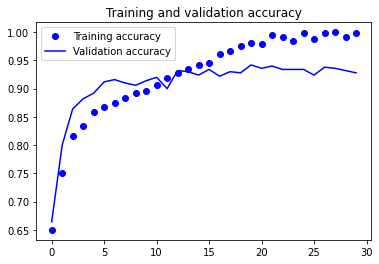

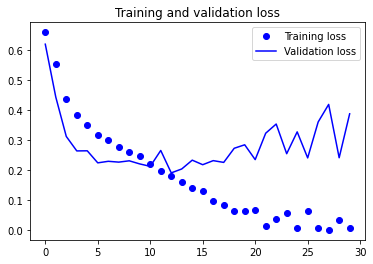

In [18]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 30
batch_size = 100
optimizer = 'adadelta'
optimizer_name = optimizer
trd_model_name = 'model_0_8-100-30-adlt-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [19]:
remark = '13-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.8 model_0 & optimizer RMSprop(lr=1e-4)

Train on 8000 samples, validate on 500 samples
Epoch 1/8
8000/8000 [==============================] - 11s 1ms/step - loss: 0.5274 - acc: 0.7416 - val_loss: 0.3101 - val_acc: 0.8660
Epoch 2/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3893 - acc: 0.8334 - val_loss: 0.2731 - val_acc: 0.8880
Epoch 3/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3413 - acc: 0.8580 - val_loss: 0.2232 - val_acc: 0.9180
Epoch 4/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.3109 - acc: 0.8719 - val_loss: 0.2158 - val_acc: 0.9120
Epoch 5/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2720 - acc: 0.8903 - val_loss: 0.2062 - val_acc: 0.9260
Epoch 6/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2398 - acc: 0.9055 - val_loss: 0.2016 - val_acc: 0.9240
Epoch 7/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2190 - acc: 0.9155 - val_loss: 0.2510 - val_acc: 0.8980
Epoch 8/8
500/5

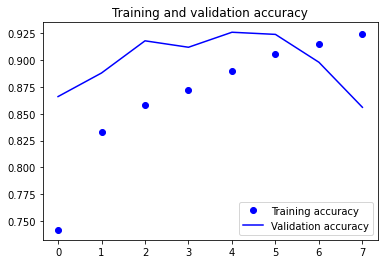

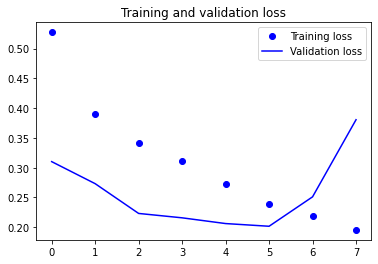

In [21]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 8
batch_size = 30
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_0_8-30-8-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [22]:
remark = 'not ok'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.9 model_0 & optimizer RMSprop(lr=1e-4)

Train on 8000 samples, validate on 500 samples
Epoch 1/30
8000/8000 [==============================] - 8s 1ms/step - loss: 0.5859 - acc: 0.6902 - val_loss: 0.4456 - val_acc: 0.8340
Epoch 2/30
8000/8000 [==============================] - 7s 917us/step - loss: 0.4825 - acc: 0.7791 - val_loss: 0.3327 - val_acc: 0.8440
Epoch 3/30
8000/8000 [==============================] - 7s 923us/step - loss: 0.4272 - acc: 0.8146 - val_loss: 0.3168 - val_acc: 0.8660
Epoch 4/30
8000/8000 [==============================] - 7s 919us/step - loss: 0.3872 - acc: 0.8353 - val_loss: 0.3355 - val_acc: 0.8620
Epoch 5/30
8000/8000 [==============================] - 7s 937us/step - loss: 0.3633 - acc: 0.8476 - val_loss: 0.2612 - val_acc: 0.8940
Epoch 6/30
8000/8000 [==============================] - 7s 913us/step - loss: 0.3457 - acc: 0.8583 - val_loss: 0.2711 - val_acc: 0.8700
Epoch 7/30
8000/8000 [==============================] - 7s 918us/step - loss: 0.3266 - acc: 0.8626 - val_loss: 0.2798 - val_acc: 0.8640
Epo

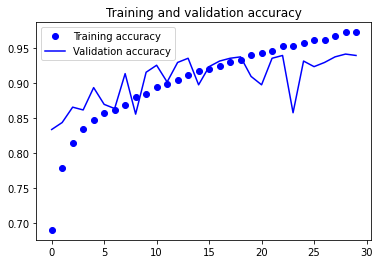

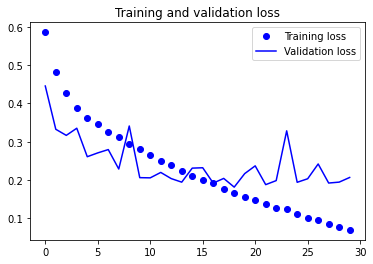

In [23]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 30
batch_size = 100
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_0_8-100-30-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [24]:
remark = '20-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit


### 3.10 model_0 & optimizer RMSprop(lr=1e-4)

Train on 8000 samples, validate on 500 samples
Epoch 1/21
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5856 - acc: 0.6971 - val_loss: 0.4281 - val_acc: 0.8100
Epoch 2/21
8000/8000 [==============================] - 7s 927us/step - loss: 0.4887 - acc: 0.7728 - val_loss: 0.4387 - val_acc: 0.7820
Epoch 3/21
8000/8000 [==============================] - 7s 937us/step - loss: 0.4233 - acc: 0.8152 - val_loss: 0.3661 - val_acc: 0.8500
Epoch 4/21
8000/8000 [==============================] - 7s 933us/step - loss: 0.3877 - acc: 0.8345 - val_loss: 0.2529 - val_acc: 0.8900
Epoch 5/21
8000/8000 [==============================] - 7s 934us/step - loss: 0.3689 - acc: 0.8396 - val_loss: 0.2444 - val_acc: 0.8940
Epoch 6/21
8000/8000 [==============================] - 8s 947us/step - loss: 0.3458 - acc: 0.8554 - val_loss: 0.2872 - val_acc: 0.8620
Epoch 7/21
8000/8000 [==============================] - 7s 934us/step - loss: 0.3236 - acc: 0.8662 - val_loss: 0.2529 - val_acc: 0.8880
Epo

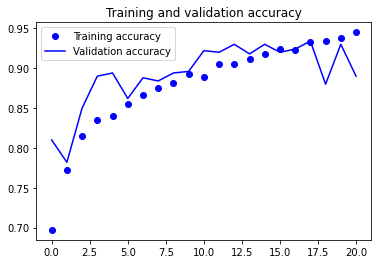

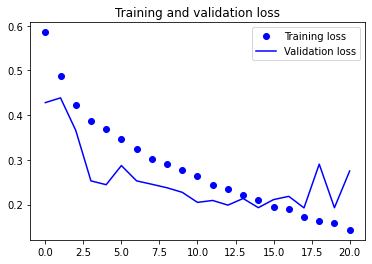

In [26]:
model = keras.models.load_model('./Models/model_0.h5') # not trained model!

epochs = 21
batch_size = 100
optimizer = optimizers.RMSprop(lr=1e-4)
optimizer_name = 'RMSprop(lr=1e-4)'
trd_model_name = 'model_0_8-100-21-RMSp-trd' # model after training, name without file extension !
notebook = 'Module_3'
model_descr = '32-64-128-256-512'
dataset_size = len(TRAIN_X)

# Training (function no. 23)

acc = my_functions.train_and_chart(batch_size, epochs, model, optimizer, 
                                   TRAIN_X, TRAIN_Y, VALID_X, VALID_Y, trd_model_name)
del(model)

In [27]:
remark = '17-overfit'

# Results saving (function no. 6)

my_functions.results_update(trd_model_name, model_descr, notebook, dataset_size, 
                            batch_size, epochs, optimizer_name, acc, remark)

# Results overview (function no. 8)

summary = pd.DataFrame(my_functions.results_preview()) 
summary.index = summary.index + 1
summary

,model_name,model_description,notebook,dataset_size,batch_size,epochs,optimizer,acc,remarks
1,model_0_0-100-150-sgd-trd,32-64-128-256-512,Module_1,1600,100,150,sgd,0.924,100-overfit
2,model_0_0-100-150-adlt-trd,32-64-128-256-512,Module_1,1600,100,150,adadelta,0.918,20-overfit
3,model_0_0-100-120-rmsp-trd,32-64-128-256-512,Module_1,1600,100,120,rmsprop,0.924,15-overfit
4,model_0_0-100-100-RMSp-trd,32-64-128-256-512,Module_1,1600,100,100,RMSprop(lr=1e-4),0.932,20-overfit
5,model_0_0-100-100-sgd-trd,32-64-128-256-512,Module_1,1600,100,100,sgd,0.904,no overfit
6,model_0_0-30-100-sgd-trd,32-64-128-256-512,Module_1,1600,30,100,sgd,0.918,40-overfit
7,model_0_0-15-40-sgd-trd,32-64-128-256-512,Module_1,1600,15,40,sgd,0.920,15-overfit
8,model_0_0-15-25-RMSp-trd,32-64-128-256-512,Module_1,1600,15,25,RMSprop(lr=1e-4),0.882,6-overfit
9,model_0_0-15-15-rmsp-trd,32-64-128-256-512,Module_1,1600,15,15,rmsprop,0.926,4-overfit
10,model_0_8-100-150-sgd-trd,32-64-128-256-512,Module_3,8000,100,150,sgd,0.522,80-overfit
